In [1]:
import numpy as np
import pylab
from scipy.io.wavfile import write
import os
from math import exp

In [2]:
samplingRate = 44100.0
samplingInterval = 1/samplingRate # 1초를 44100개로 샘플링

In [9]:
class functionGenerator:
    freq = {"C":262, "C#":277, "D":294, "D#":311, "E":330, "F":349, "F#":370, "G":392, "G#":415, "A":440, "A#":466, "B":494}
    def __init__(self, time, scale, wave, pitch):
        self.time = time # 재생시간
        self.frequency = self.freq[scale] * pitch # 음의 진동수
        self.T = int((1/self.frequency)/samplingInterval) # 주기당 interval의 개수
        self.timeSequence = np.arange(0, time, samplingInterval) # 재생시간을 시간단위로 일정하게 나눈 시퀀스
        self.wave = wave
        self.signal = self.functionGenerate()
    def functionGenerate(self):
        if (self.wave == "sin"):
            signal = np.sin(2*np.pi*self.frequency*self.timeSequence)
            pylab.plot(self.timeSequence[:self.T],signal[:self.T])
            return signal
        elif (self.wave == "triangular"):
            signal1 = np.arange(0, 1, 1/(self.T / 4))
            signal2 = np.arange(1, -1, -1/(self.T / 4))
            signal3 = np.arange(-1, 0, 1/(self.T / 4))
            signala = np.concatenate((signal1, signal2, signal3), axis = 0)
            signal = signala
            while(len(signal) < len(self.timeSequence)):
                signal = np.concatenate((signal, signala), axis = 0)
            signal = signal[:len(self.timeSequence)]
            pylab.plot(self.timeSequence[:self.T],signal[:self.T])
            return signal
        elif (self.wave == "rectangular"):
            signal1 = np.full(int(self.T/4), -1)
            signal2 = np.full(int(self.T/2), 1)
            signal3 = np.full(int(self.T/4), -1)
            signala = np.concatenate((signal1, signal2, signal3), axis = 0)
            signal = signala
            while(len(signal) < len(self.timeSequence)):
                signal = np.concatenate((signal, signala), axis = 0)
            signal = signal[:len(self.timeSequence)]
            pylab.plot(self.timeSequence[:self.T],signal[:self.T])
            return signal
        else:
            signal = np.random.rand(len(self.timeSequence))
            pylab.plot(self.timeSequence[:self.T],signal[:self.T])
            return signal
    def fourierTransform(self):
        power_domain = np.fft.fft(self.signal)
        freq_domain = np.fft.fftfreq(len(self.timeSequence), samplingInterval)        
        db_domain = 20*np.log10(np.abs(np.where(power_domain == 0, 0.0000000000000000000000000000000000000000000000000000000000000000000000000001, power_domain)))
        pylab.plot(freq_domain, db_domain)
        pylab.xlim(0, samplingRate/2)
        pylab.ylim(-100, 300)

132300


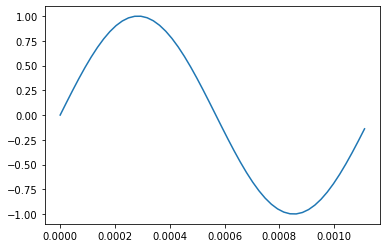

In [7]:
x = functionGenerator(3, "A", "sin", 2)
print(len(x.signal))

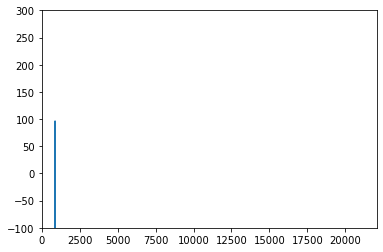

In [8]:
x.fourierTransform()

0

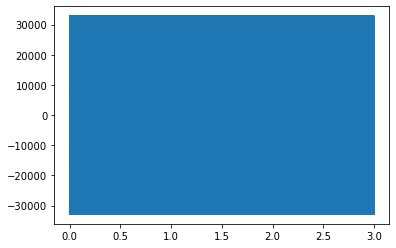

In [73]:
# save as wav file
scaled = np.int16(x.signal/np.max(np.abs(x.signal)) * 32767)
pylab.plot(x.timeSequence, scaled)

write('har.wav', 44100, scaled)
# play wav file
os.system("har.wav")

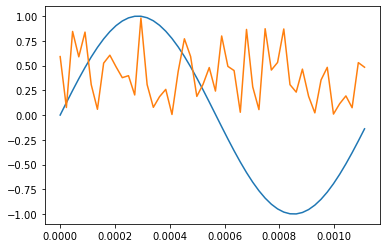

In [16]:
s1 = functionGenerator(3, "A", "sin", 2)
s2 = functionGenerator(3, "A", "noise", 2)
sig = s1.signal+s2.signal

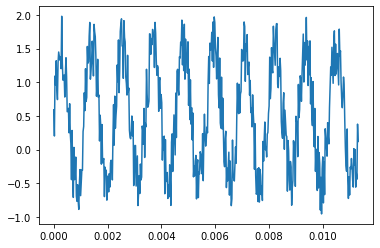

In [17]:
pylab.plot(s1.timeSequence[:500], sig[:500])

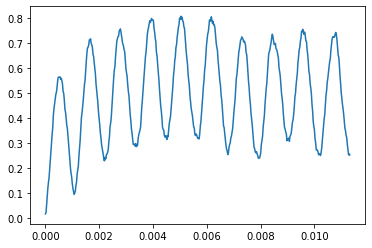

In [24]:
import numpy as np

class LowPassFilter:
    def __init__(self, cutoff_freq, ts):
        self.ts = ts
        self.cutoff_freq = cutoff_freq
        self.pre_out = 0.
        self.tau = self.calc_filter_coef() 
        
    def calc_filter_coef(self):
        w_cut = 2*np.pi*self.cutoff_freq
        return 1/w_cut
        
    def filter(self, data):
        out = (self.tau * self.pre_out + self.ts * data) / (self.tau + self.ts)
        self.pre_out = out
        return out
lpf = LowPassFilter(cutoff_freq = 0.5, ts = 0.01)
filtered_data = [lpf.filter(data) for data in sig]
pylab.plot(s1.timeSequence[:500], filtered_data[:500])

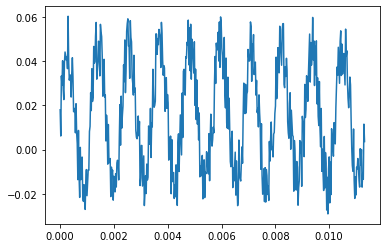

In [23]:
def lowpass(cutoff, ts, data):
    tau = 1/(2*np.pi*cutoff)
    return (tau * 0 + ts * data) / (tau + ts)
filtered_data = [lowpass(0.5, 0.01, data) for data in sig]
pylab.plot(s1.timeSequence[:500], filtered_data[:500])

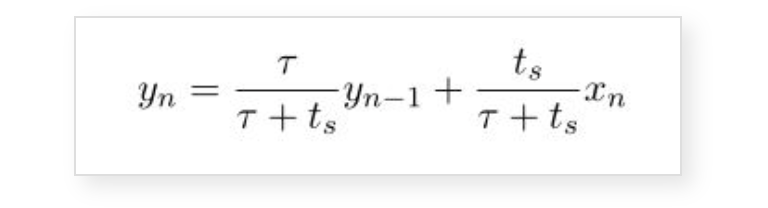
